In [2]:
import xarray as xr 
import matplotlib.pylab as plt
import Rbeast as rb
import pandas as pd
import numpy as np
import geopandas as gpd
import rioxarray

Initialization done!


In [179]:
shp_file = "/home/hamid/NASA_ABoVE/greeness/data/shp_files/CoreDomain_geographic.shp"
geodf = gpd.read_file(shp_file)

In [93]:
fnames = []
for i in np.arange(1982,1991):
    for j in np.arange(1,13):
        for k in np.arange(1,3):
            fnames.append("../../data/lai4g/1982_1990_TIFF/GIMMS_LAI4g_V1.0_"+str(i)+("{:02d}".format(j)+("{:02d}".format(k))+".tif"))
ds_1982_1990 = xr.open_mfdataset(fnames,combine='nested',concat_dim="band")
ds_1982_1990 = ds_1982_1990.rename_vars({"band_data":"lai"})
t_1982_1990 = pd.date_range("1/1/1982",end="12/31/1990",freq="SMS")
da_1982_1990 = ds_1982_1990["lai"].rename({"band":"time"})
da_1982_1990["time"] = t_1982_1990
da_1982_1990 = da_1982_1990.where(da_1982_1990!=65535)*0.01
da_1982_1990 = da_1982_1990.rio.write_crs(4326)
clipped_1982_1990 = da_1982_1990.rio.clip(geodf.geometry)
clipped_1982_1990.to_netcdf("../../data/lai4g/clipped/clipped_1982_1990.nc")


In [186]:
fnames = []
for i in np.arange(1991,2001):
    for j in np.arange(1,13):
        for k in np.arange(1,3):
            fnames.append("../../data/lai4g/1991_2000_TIFF/GIMMS_LAI4g_V1.0_"+str(i)+("{:02d}".format(j)+("{:02d}".format(k))+".tif"))
ds_1991_2000 = xr.open_mfdataset(fnames,combine='nested',concat_dim="band")
ds_1991_2000 = ds_1991_2000.rename_vars({"band_data":"lai"})
t_1991_2000 = pd.date_range("1/1/1991",end="12/31/2000",freq="SMS")
da_1991_2000 = ds_1991_2000["lai"].rename({"band":"time"})
da_1991_2000["time"] = t_1991_2000
da_1991_2000 = da_1991_2000.where(da_1991_2000!=65535)*0.01
da_1991_2000 = da_1991_2000.rio.write_crs(4326)
clipped_1991_2000 = da_1991_2000.rio.clip(geodf.geometry)
clipped_1991_2000.to_netcdf("../../data/lai4g/clipped/clipped_1991_2000.nc")

In [195]:
fnames = []
for i in np.arange(2001,2011):
    for j in np.arange(1,13):
        for k in np.arange(1,3):
            fnames.append("../../data/lai4g/2001_2010_TIFF/GIMMS_LAI4g_V1.0_"+str(i)+("{:02d}".format(j)+("{:02d}".format(k))+".tif"))
ds_2001_2010 = xr.open_mfdataset(fnames,combine='nested',concat_dim="band")
ds_2001_2010 = ds_2001_2010.rename_vars({"band_data":"lai"})
t_2001_2010 = pd.date_range("1/1/2001",end="12/31/2010",freq="SMS")
da_2001_2010 = ds_2001_2010["lai"].rename({"band":"time"})
da_2001_2010["time"] = t_2001_2010
da_2001_2010 = da_2001_2010.where(da_2001_2010!=65535)*0.01
da_2001_2010 = da_2001_2010.rio.write_crs(4326)
clipped_2001_2010 = da_2001_2010.rio.clip(geodf.geometry)
clipped_2001_2010.to_netcdf("../../data/lai4g/clipped/clipped_2001_2010.nc")

In [198]:
fnames = []
for i in np.arange(2011,2021):
    for j in np.arange(1,13):
        for k in np.arange(1,3):
            fnames.append("../../data/lai4g/2011_2020_TIFF/GIMMS_LAI4g_V1.0_"+str(i)+("{:02d}".format(j)+("{:02d}".format(k))+".tif"))
ds_2011_2020 = xr.open_mfdataset(fnames,combine='nested',concat_dim="band")
ds_2011_2020 = ds_2011_2020.rename_vars({"band_data":"lai"})
t_2011_2020 = pd.date_range("1/1/2011",end="12/31/2020",freq="SMS")
da_2011_2020 = ds_2011_2020["lai"].rename({"band":"time"})
da_2011_2020["time"] = t_2011_2020
da_2011_2020 = da_2011_2020.where(da_2011_2020!=65535)*0.01
da_2011_2020 = da_2011_2020.rio.write_crs(4326)
clipped_2011_2020 = da_2011_2020.rio.clip(geodf.geometry)
clipped_2011_2020.to_netcdf("../../data/lai4g/clipped/clipped_2011_2020.nc")

In [201]:
ds_all = xr.concat([clipped_1982_1990,clipped_1991_2000,clipped_2001_2010,clipped_2011_2020],dim="time")
ds_all.to_netcdf("../../working/lai4g.nc")

In [3]:
ds_all = xr.open_dataset("../../working/lai4g.nc")

In [4]:
ds_all

<xarray.Dataset>
Dimensions:      (time: 936, x: 808, y: 269)
Coordinates:
  * time         (time) datetime64[ns] 1982-01-01 1982-01-15 ... 2020-12-15
  * x            (x) float64 -168.0 -168.0 -167.9 ... -101.0 -100.9 -100.8
  * y            (y) float64 74.54 74.46 74.38 74.29 ... 52.46 52.38 52.29 52.21
Data variables:
    spatial_ref  int64 ...
    lai          (time, y, x) float32 ...

In [220]:
ds_annual_max = ds_all.groupby("time.year").mean().rename({"year":"time","x":"lon","y":"lat"})

In [221]:
ds_tmp = ds_annual_max.sel(time=slice("1984","2014"))

In [222]:
ds_tmp_mean = ds_tmp.mean(["lat","lon"]).values

In [223]:
out = rb.beast( ds_tmp_mean, start=1984, season='none')


#--------------------------------------------------#
#      OPTIONS used in the MCMC inference          #
#--------------------------------------------------#
#  Set extra.printOptions=0 to suppress printing   #
#--------------------------------------------------#

#......Start of displaying 'MetaData' ......
  metadata =  rb.args() ### or 'lambda: None': just get an empty object###
  metadata.isRegularOrdered = True
  metadata.season           = 'none'
  metadata.startTime        = 1984.00000
  metadata.deltaTime        = 1.00000
  metadata.whichDimIsTime   = 1
  metadata.missingValue     = float('nan')
  metadata.maxMissingRate   = 0.7500
  metadata.detrend          = False
#........End of displaying MetaData ........

#......Start of displaying 'prior' ......
  prior =  rb.args() ### or 'lambda: None': just get an empty object###
  prior.modelPriorType	  = 1
  prior.trendMinOrder	  = 0
  prior.trendMaxOrder	  = 1
  prior.trendMinKnotNum  = 0
  prior.trendMaxKnotNum  = 6
  prior.tre

/home/hamid/anaconda3/envs/geospatial/lib/python3.9/site-packages/Rbeast/plotbeast.py:244: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(<Figure size 432x288 with 5 Axes>,
 array([<AxesSubplot:xlabel='[]', ylabel='trend'>,
        <AxesSubplot:xlabel='[]', ylabel='Pr(tcp)'>,
        <AxesSubplot:xlabel='[]', ylabel='tOrder'>,
        <AxesSubplot:xlabel='[]', ylabel='slpsgn'>,
        <AxesSubplot:xlabel='time', ylabel='error'>], dtype=object))

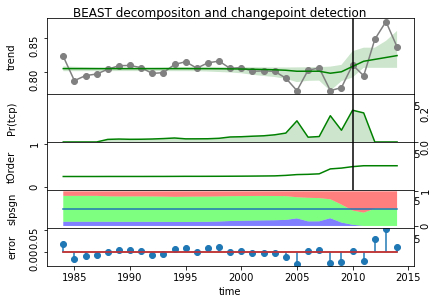

In [224]:
rb.plot(out)

In [225]:
xr.open_dataarray("../../arr_id.nc")

<xarray.DataArray 'LAI' (lat: 448, lon: 1348)>
[603904 values with dtype=float32]
Coordinates:
  * lat          (lat) float32 74.53 74.47 74.43 74.38 ... 52.27 52.22 52.17
  * lon          (lon) float32 -168.1 -168.0 -168.0 ... -100.8 -100.8 -100.7
    spatial_ref  int64 ...